In [ ]:
# default_exp models.utils

In [ ]:
# hide
%load_ext autoreload
%autoreload 2

In [ ]:
# hide
from nbdev.showdoc import *

In [ ]:
# export
from grade_classif.core import ifnone
from grade_classif.models.hooks import Hooks
from grade_classif.imports import *

In [ ]:
# export
def named_leaf_modules(name, model):
    named_children = list(model.named_children())
    if named_children==[]:
        model.name = name
        return [model]
    else:
        res = []
        for n, m in named_children:
            pref = name+'.' if name != '' else ''
            res += named_leaf_modules(pref+n, m)
        return res

In [ ]:
# export
def get_sizes(model, input_shape=(3, 224, 224), leaf_modules=None):     
    leaf_modules = ifnone(leaf_modules, named_leaf_modules('', model))
    
    class Count:
        def __init__(self):
            self.k = 0
    count = Count()        
    def _hook(model, input, output):
        model.k = count.k
        count.k += 1
        return model, output
    
    with Hooks(leaf_modules, _hook) as hooks:
        x = torch.rand(2, *input_shape)
        model.eval()(x)
        sizes = [hook.stored[1].shape for hook in hooks]
        mods = [hook.stored[0] for hook in hooks]
    idxs = np.argsort([mod.k for mod in mods])
    return np.array(sizes)[idxs], np.array(mods)[idxs]

In [ ]:
# export
def gaussian_mask(m, s, d, R, C):
    # indices to create centres
    R = torch.arange(R, dtype=torch.float32).reshape((R, 1))
    C = torch.arange(C, dtype=torch.float32).reshape((1, C))
    centres = m + R * d
    column_centres = C - centres
    mask = torch.exp(-.5 * torch.square(column_centres / s))
    # we add eps for numerical stability
    normalised_mask = mask / (mask.sum(1, keepdims=True) + 1e-8)
    return normalised_mask

In [ ]:
m = 0
s = 0.5
d = 256//32

In [ ]:
Ax = gaussian_mask(m, s, d, 32, 256)
Ay = gaussian_mask(m, s, d, 32, 256)

In [ ]:
img = cv2.imread('sample_data/Patches_MGI_256_3/1/CF_PACS04rescan_06P1306/CF_PACS04rescan_06P1306_12288_102400.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32)/255

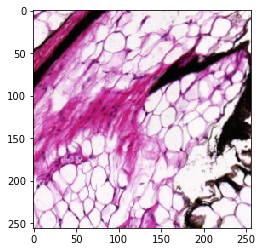

In [ ]:
plt.imshow(img)

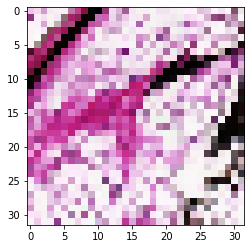

In [ ]:
plt.imshow((Ax[None] @ torch.tensor(img.transpose((2, 0, 1))) @ Ay.T[None]).numpy().transpose((1, 2, 0)))

In [ ]:
# export
def get_num_features(model):
    sizes, _ = get_sizes(model)
    return sizes[-1, 1]

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_core.ipynb.
Converted 01_train.ipynb.
Converted 02_predict.ipynb.
Converted 10_data_read.ipynb.
Converted 11_data_loaders.ipynb.
Converted 12_data_dataset.ipynb.
Converted 13_data_utils.ipynb.
Converted 14_data_transforms.ipynb.
Converted 20_models_pl_modules.ipynb.
Converted 21_models_modules.ipynb.
Converted 22_models_utils.ipynb.
Converted 23_models_hooks.ipynb.
Converted 80_params_defaults.ipynb.
Converted 81_params_norm.ipynb.
Converted 82_params_classif.ipynb.
Converted 83_params_predict.ipynb.
Converted 99_index.ipynb.
